Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [84]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [85]:
df = pd.read_csv('/content/train.csv')

In [86]:
df.info()

print("\nThe first few rows of the dataframe:\n")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

The first few rows of the dataframe:

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0 

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

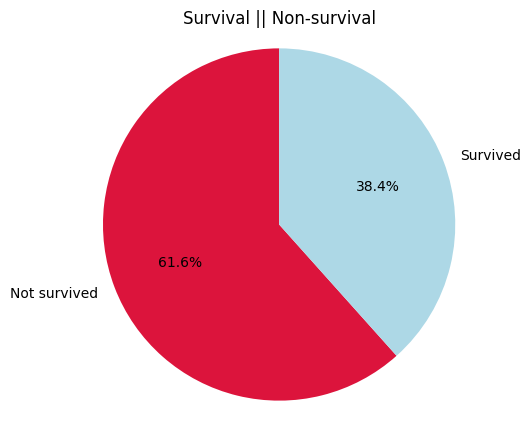

In [87]:
survival_counts = df['Survived'].value_counts()

labels = ['Not survived', 'Survived']

colors = ['crimson', 'lightblue']

plt.figure(figsize=(5, 5))
plt.pie(survival_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Survival || Non-survival')
plt.axis('equal')
plt.show()

На діаграмі показана статистика виживших та загиблих людей через затоплення судна. 38.4% людеей вижило, тоді як 61.6% загинули. Побудова діаграми:
- треба взяти колонку Survived
- порахувати кількість 0 (не вижив) та 1 (вижив)
- підписи секторів labels = ['Not survived', 'Survived']
- plt.pie() для побудови діаграми
- autopct='%1.1f%%' відсотки з однією цифрою після крапки
- startangle=90 — початок малювання з 90 градусів

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


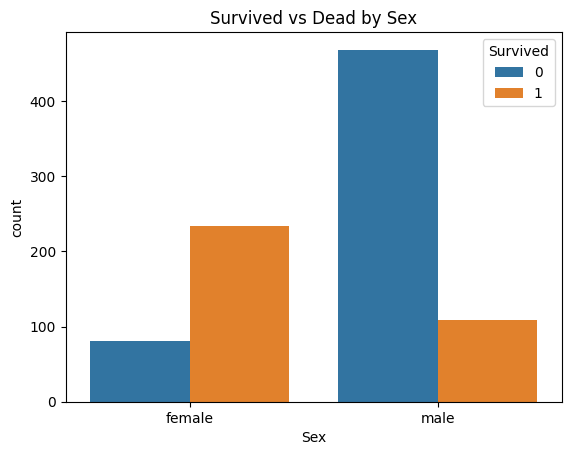

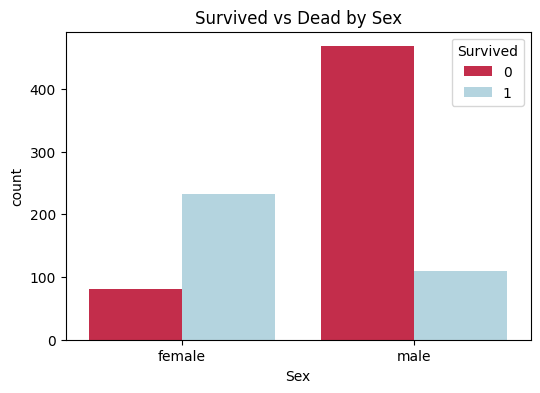

In [88]:
grouped_data = df.groupby(['Sex', 'Survived'], as_index=False).size()

plt.figure(figsize=(6, 4))
sns.barplot(data=grouped_data, x='Sex', y='size', hue='Survived', palette={0: 'crimson', 1: 'lightblue'})

plt.title('Survived vs Dead by Sex')
plt.ylabel('count')
plt.show()

На діаграмі показано співвідношення виживших до загиблих людей, також це розділене за сттаттю. Як можна побачити жінки частіше виживали і рідше гинули, чоловіки навпаки відповідно. Побудова діаграми:
- треба взяти колонки Sex та Survived
- порахувати загальну кількість людей по групах
- треба використати as_index=False для отримання таблицю
- імпортували бібліотеку import seaborn as sns
- команда sns.barplot() створює стовпчиковий графік
- вісь X — стать
- вісь Y — кількість людей
- hue розділяє стовпчики на тих, хто вижив (1) та загинув (0)

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

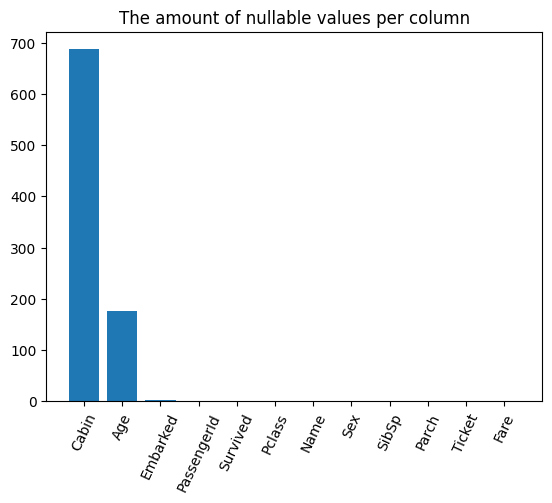

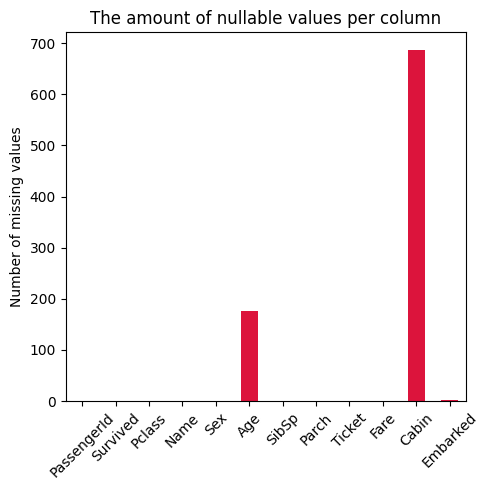

In [89]:
missing_values = df.isnull().sum()

plt.figure(figsize=(5, 5))
missing_values.plot(kind='bar', color='crimson')
plt.title('The amount of nullable values per column')
plt.ylabel('Number of missing values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

На діаграмі показано кількість пропущених значень у кожній колонці. Найбільше пропущених значень у Cabin - майже 700,  Age - майже 200, і Embarked зовсім мало. Інші колонки не мають пропусків. Побудова діаграми:
- треба знайти, скільки значень пропущено в кожній колонці
- для цього df.isnull().sum()
- тільки ті колонки, де є пропуски (> 0)
- стовпчикова діаграма через plot(kind='bar')
- підписи осей (ylabel)
- поворот підписів (xticks(rotation=45))

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

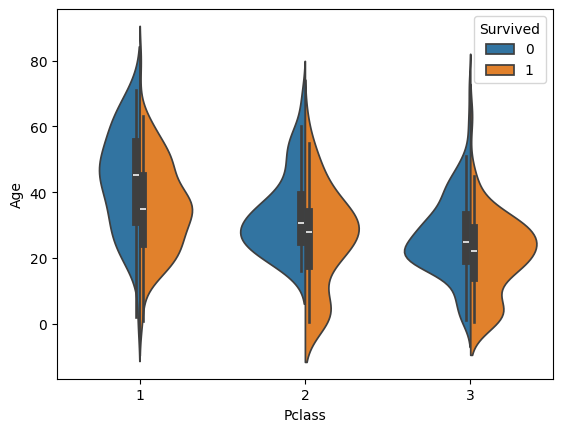

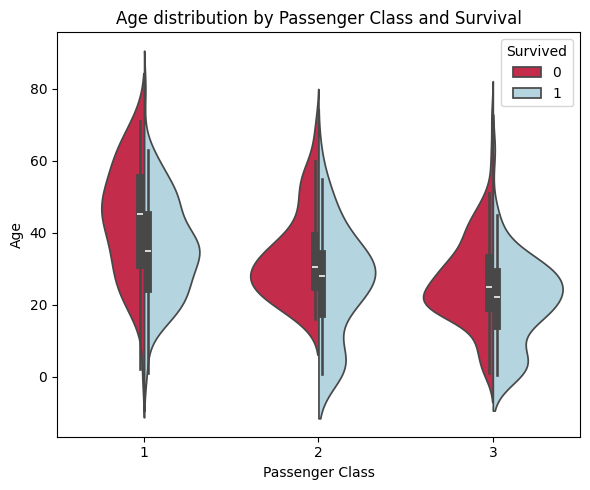

In [90]:
plt.figure(figsize=(6, 5))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split=True, palette={0: 'crimson', 1: 'lightblue'})

plt.title('Age distribution by Passenger Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.legend(title='Survived')

plt.tight_layout()
plt.show()

На графіку показано розподіл частот віку пасажирів. Це violin plot, тобто графік показує форму розподілу значень, розташування основної маси даних,порівняння для кожної групи.З діаграми видно, що пасажири 1 класу були старші, і серед них більше виживших, у 3 класі більше молодих пасажирів і з них менше виживших. Побудова графіку:
- взяли колонки Pclass та Age
- hue='Survived', щоб розділити на 2 групи: 0 - загинули, 1 - вижили
- sns.violinplot(): x='Pclass' - класи, y='Age' - вік пасажирів
- split=True — розділяє графік на дві половини

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


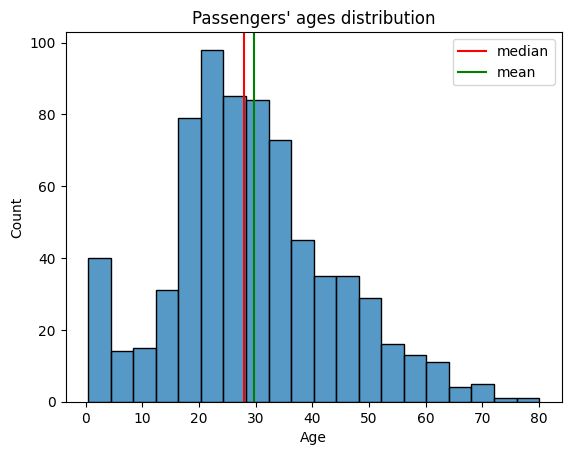

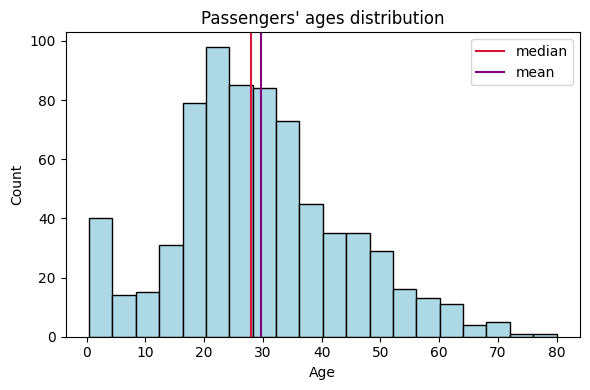

In [91]:
ages = df['Age'].dropna()

median_age = ages.median()
mean_age = ages.mean()

plt.figure(figsize=(6, 4))
plt.hist(ages, bins=20, color='lightblue', edgecolor='black')

plt.axvline(median_age, color='crimson', linestyle='-', label='median')
plt.axvline(mean_age, color='purple', linestyle='-', label='mean')

plt.title("Passengers' ages distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

На графіку показано розподіл віку пасажирів. Це гістограма,на ній показано вік пасажирів та їхня кількість. Найбільше пасажирів у віці від 20 до 30 років.
Червона лінія - середнє значення віку, фіолетова лінія  середнє арифметичне значення віку. Побудова графіка:
- у Age видалилити пропущені значення
- побудували гістограму за допомогою plt.hist(): bins=20 - кількість стовпчиків
- порахувати median і mean значення віку
- додати вертикальні лінії: plt.axvline()
- додати оформлення: заголовок, легенду та підписи

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

**Яка була ймовірність того, що чоловік, який їхав у 3 класі, виживе?**

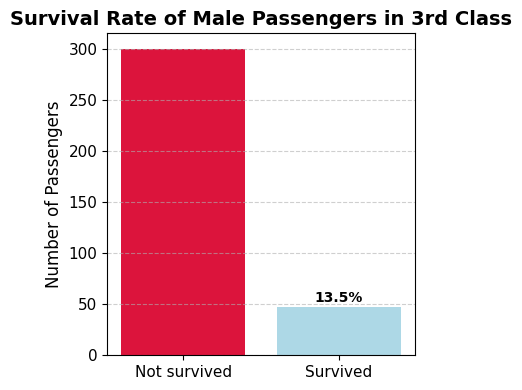

In [92]:
plt.figure(figsize=(4, 4))

counts = men_3rd_class['Survived'].value_counts().sort_index()
labels = ['Not survived', 'Survived']
colors = ['crimson', 'lightblue']

bars = plt.bar(labels, counts, color=colors)

percentage = count / total_men_3rd_class * 100
plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{percentage:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.title('Survival Rate of Male Passengers in 3rd Class', fontsize=14, fontweight='bold')
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

На графіку показано шанси виживання для чоловіків, які подорожували у 3 класі.
Це стовпчикова діаграма, яка показує: скільки пасажирів вижили (Survived = 1, блакитний стовпчик), скільки загинули (Survived = 0, червоний стовпчик).
З графіка видно, що 86.5% чоловіків 3-го класу загинули, лише 13.5% вижили. Побудова графіка:
- фільтрація: тільки чоловіки з 3-го класу
- порахувати кількість загиблих і тих, хто вижив
- побудували барчарт:bars = plt.bar(labels, counts, color=colors)
- оформлення: розміри графіка, заголовок, підписи осей, шрифти, сітка (grid)

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

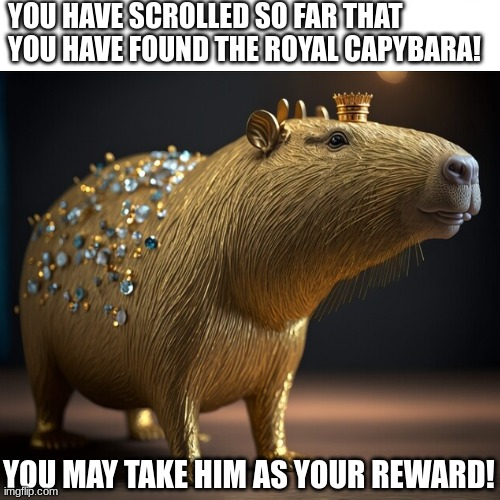